<div class="alert alert-block">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

## 8.7 Relations between Multivariate Variables: Covariance and Correlation

### 8.7.1 Covariance

Covariance is a measure for the degree of relationship between two variables and
is related to variance: while variance is a measure for the spread of distribution,
covariance is a measure of how strongly these two variable vary together.

<div class="alert alert-block alert-info">
<b>Covariance:</b> 
Typically, the expected value of the population is unknown. Then the sample means (indicated by a bar) are used as estimators for the population and the covariance is given by:

$$\operatorname{Cov}(X,Y)=\frac{1}{N-1}\sum\limits_{i=1}^{N}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)\;.$$

</div>


In [51]:
import numpy as np

# initialize the random number generator (use "0" as seed for reproducibility)
rng = np.random.default_rng()

# generate two random variables that are related to each other
x = rng.random(100)  
y = 0.5 * x + np.random.normal(0, 0.1, 100)  # y is linearly related to x with some noise

# Mean centering the variables
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)

# Computing covariance using dot product
# Since we are dealing with vectors, this will give us the covariance between x and y
covariance = np.dot(x_centered, y_centered) / (len(x) - 1)

print("Covariance between X and Y:", covariance)


Covariance between X and Y: 0.041519187075006694


### 8.7.2 Covariance Matrix
The covariance matrix represents the correlations of several random variables:

\begin{align}
	\operatorname{Cov}(\boldsymbol{\mathsf{X}}) = 
	\begin{bmatrix}
		\operatorname{Cov}(X_1, X_1)\;\;\; & \operatorname{Cov}(X_1, X_2)\;\;\; & \cdots\;\;\; & \operatorname{Cov}(X_1, X_n) \\
		\operatorname{Cov}(X_2, X_1)\;\;\; & \operatorname{Cov}(X_2, X_2)\;\;\; & \cdots\;\;\; & \operatorname{Cov}(X_2, X_n) \\
		\vdots             &                    & \ddots\;\; & \vdots         \\
		\operatorname{Cov}(X_m, X_1)\;\;\; & \operatorname{Cov}(X_m, X_2)\;\;\; & \cdots\;\;\; & \operatorname{Cov}(X_m, X_n) 
	\end{bmatrix}\;.
\end{align}

Assuming that the data is contained in the data matrix $\boldsymbol{\mathsf{X}}$ where each column contains the records of one feature we can compute the sample (or data) covariance matrix $\boldsymbol{\mathsf{S}}$ as an approximation for the population covariance matrix. 
There, the first step is to center the data by subtracting the mean of a column, $\bar{X}_j$ form all records of that column:

$$\bar{x}_{ij} = x_{ij} - \bar{X}_j\;.$$

This results then in the centered data matrix $\bar{\boldsymbol{\mathsf{X}}}$. 

<div class="alert alert-block alert-info">
<b>Covariance Matrix:</b>
With the above introduced centered data matrix, one can easily compute the smaple covariance matrix as

$$\boldsymbol{\mathsf{S}} = \frac{1}{n-1} \bar{\boldsymbol{\mathsf{X}}}^{\rm T} \bar{\boldsymbol{\mathsf{X}}}\;.$$
</div>


In [52]:
import numpy as np
rng = np.random.default_rng()   # create a random number generator

n = 100      # number of records

In [53]:
X1 = np.linspace(0.03, 97, num=n) + rng.normal(loc=0, scale=0.1, size=n)
X2 = 5 + 0.1 * X1 + rng.normal(loc=0, scale=1, size=n)
X = np.vstack((X1, X2)).T

# center the feature matrix
Xc = X - np.mean(X, axis=0)

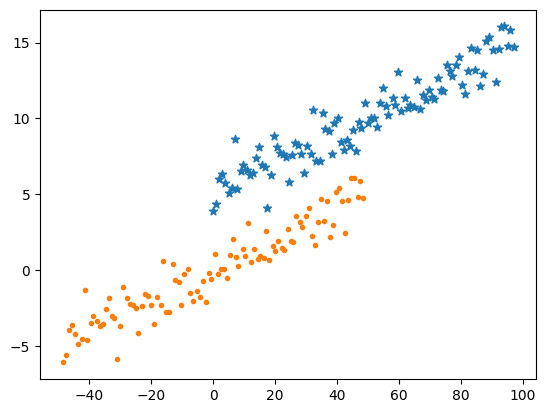

In [54]:
# observe that the small dots are centered around (0|0):
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='*')
ax.scatter(Xc[:, 0], Xc[:, 1], marker='.')


In [55]:
S = 1 / (n - 1) * (Xc.T @ Xc)
S

array([[807.92331748,  80.36271258],
       [ 80.36271258,   9.00291874]])

In [56]:
# now check if this is the same as the `numpy` function:
# note the `rowvar=False` because our features are in columns!
np.allclose(S, np.cov(X, rowvar=False))

True

### 8.7.4 Correlation Matrix
#### Example 8.8: Matrix of Correlation Coefficients for the Iris Dataset

Here, we use the iris dataset contained in the `MDSdata` package (see the description at https://mds-book.org):

In [57]:
from mdsdata import DS1

X, y = DS1.load_data(return_X_y=True)
print(f"X has {X.shape[0]} records and {X.shape[1]} features.")

X has 150 records and 4 features.


For computing the matrix of correlation coefficients we use the numpy function
`corrcoef` which, in analogy to the covariance matrix takes the feature matrix and
needs to be informed that the features are in columns:

In [58]:
import numpy as np
cor = np.corrcoef(X, rowvar=False)
cor

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

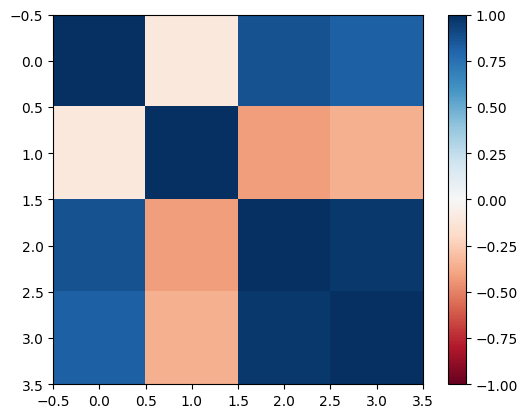

In [59]:
import matplotlib.pyplot as plt
im = plt.imshow(cor, vmin=-1, vmax=1, cmap='RdBu')
plt.colorbar(im)